## Predicting Heart Disease Using Machine Learning
 This notebook looks into using various python ML and data science libraries to predict whether a patient has heart disease or not based on their medical attributes.

## 1.Problem Definition 
> Given a patient's clinical paramenters can we predict whether they have heart disease or not?

## 2.Data
> The original data came from the UCI ML repository, also available on kaggle.

## 3.Evaluation

> If we can achieve a 95% accuracy at making predictions, we'll pursue the project.

## 4.Features

> This is some information about the features in the dataset

**Data dictionary**

* age
* sex (1=Male, 0=Female)
* chest pain type (4 values)
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (not heart related)
  - 3: Asymptomatics: chest pain not showing signs of disease
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target : 0 = No Heart Disease, 1 = Heart Disease 

In [1]:
## Importing project tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Scikit Learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Loading the Data

In [2]:
df = pd.read_csv("../data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

1. What questions are you trying to solve?
2. What kind of data is available and how to treat different types.
3. What's missing from the data and how to deal with it?
4. Are there outliers and how to handle them.
5. How can you add, change or remove features to get more from the dataset.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

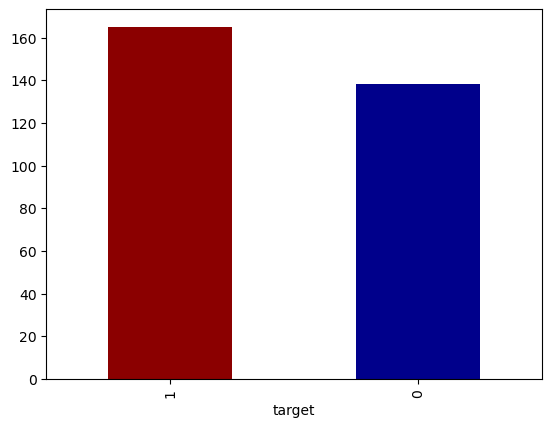

In [5]:
df["target"].value_counts().plot(kind="bar", color=["darkred", "darkblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency According to Sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
#Comparing the target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


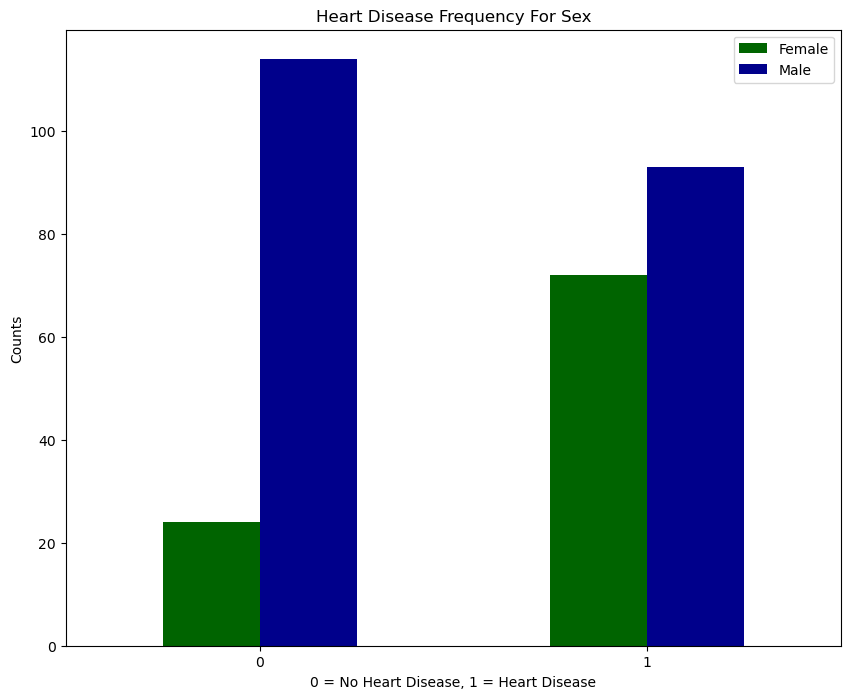

In [11]:
#Visual representation
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 8), color=["darkgreen", "darkblue"])

plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Counts")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [12]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

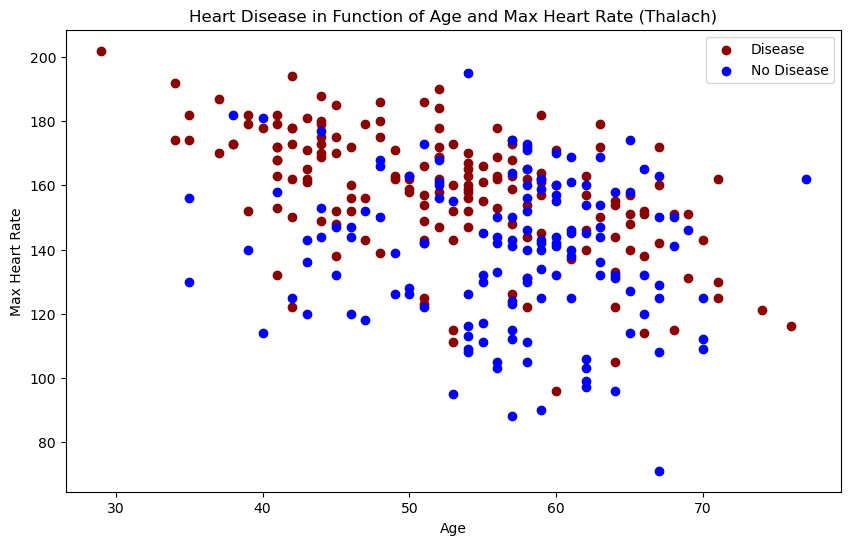

In [13]:
plt.figure(figsize=(10,6))


#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="darkred")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
             df.thalach[df.target==0],
             c="blue")

plt.title("Heart Disease in Function of Age and Max Heart Rate (Thalach)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

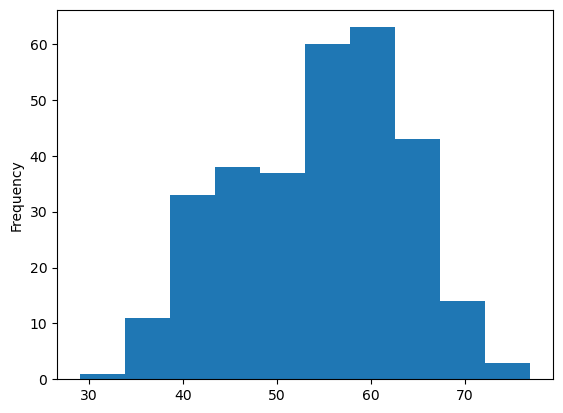

In [14]:
## Histogram to visualize age distribution
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

* chest pain type (4 values)
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (not heart related)
  - 3: Asymptomatics: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


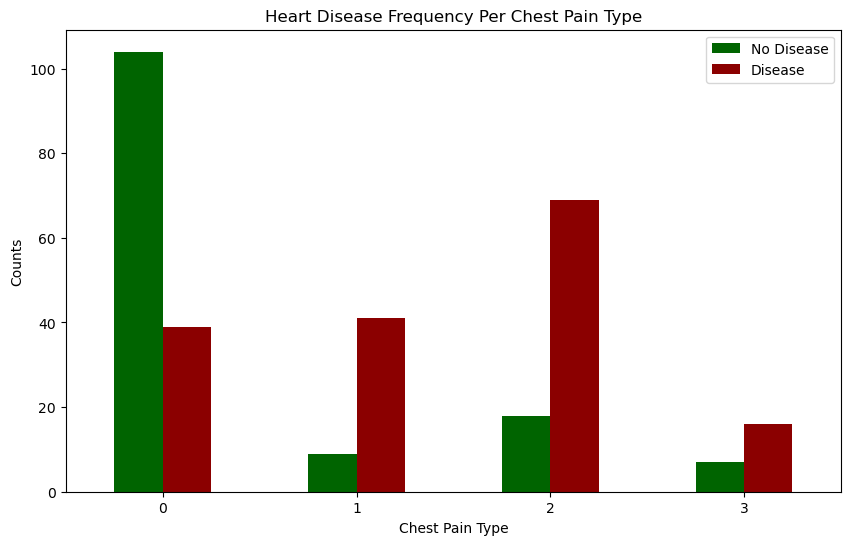

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["darkgreen", "darkred"]);

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Counts")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Correlation Matrix

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


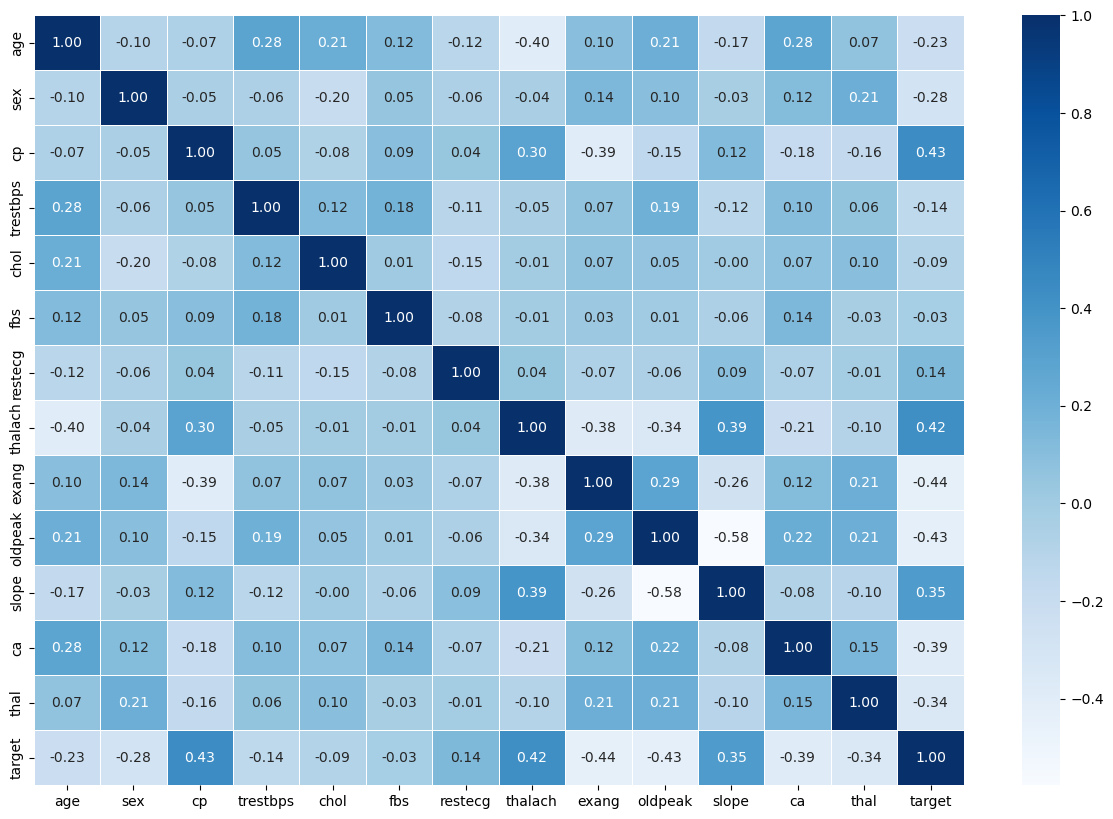

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="Blues");

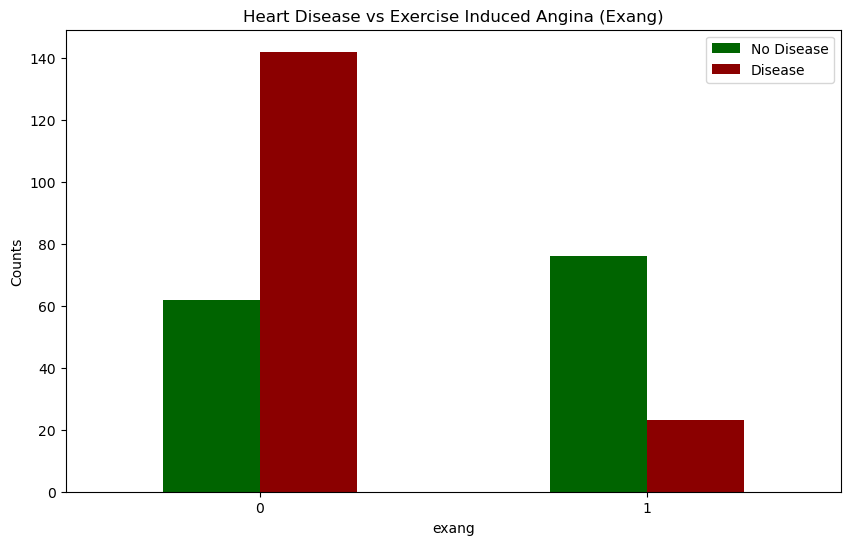

In [20]:
pd.crosstab(df.exang, df.target).plot(kind="bar", figsize=(10, 6), color=(["darkgreen", "darkred"]))
plt.title("Heart Disease vs Exercise Induced Angina (Exang)")
plt.ylabel("Counts")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#Splitting data into features and labels
X = df.drop("target", axis=1)
y = df.target

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
#to reproduce results
np.random.seed(42)

#Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
print((len(df) * 0.8) , len(X_train))
if len(df) == (len(y_train) + len(y_test)):
    print("Correctly split")

242.4 242
Correctly split


Three ML Models will be fitted to the data to try and find patterns:
1. Logistic Regression
2. K Neighbors Classifier
3. Random Forest Classifier

In [27]:
#Putting models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

#function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dictionary of the chosen models 
    X_train : training dataset(no labels)
    X_test : testing dataset(labels)
    y_train : training labels
    y_test : testing labels
    """

    #setting random seed
    np.random.seed(42)

    #dictionary to store model scores
    model_scores = {}

    #looping through models
    for name, model in models.items():
        #fitting model to data
        model.fit(X_train, y_train)
        #SCoring model and appending to the scores dictionary
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [28]:
model_scores = fit_and_score(models,
                             X_train=X_train, X_test=X_test,
                             y_train=y_train, y_test=y_test)

model_scores

C:\Users\iamga\Desktop\ML_Projects\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Visual Comparison of Model Scores

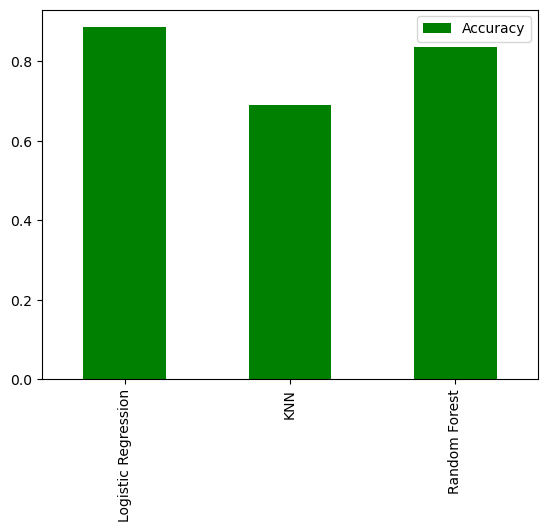

In [29]:
model_comparison = pd.DataFrame(model_scores, index=["Accuracy"])
model_comparison.T.plot.bar(color="green");

## Improving model
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area Under the Curve (AUC)

## Hyperparameter tuning

In [30]:
#Tuning KNeighbors Classifier
train_scores = []
test_scores = []

#list of different n_neighbors values
neighbors = range(1, 21)

#instantiating classifier
knn = KNeighborsClassifier()

#looping through the different n_neighbours values
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fitting the algorithm
    knn.fit(X_train, y_train)

    #updating the train scores
    train_scores.append(knn.score(X_train, y_train))

    #updating test scores list
    test_scores.append(knn.score(X_test, y_test))

In [31]:
# train_scores = []
# test_scores = []

# neighbors = range(1, 21)

# KNN = KNeighborsClassifier()

# for n in neighbors:
#     KNN.set_params(n_neighbors=n)
#     KNN.fit(X_train, y_train)
#     train_score = KNN.score(X_train, y_train)
#     train_scores.append(train_score)
#     test_score = KNN.score(X_test, y_test)
#     test_scores.append(test_score)

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The highest KNN score on the test data set is 0.75%


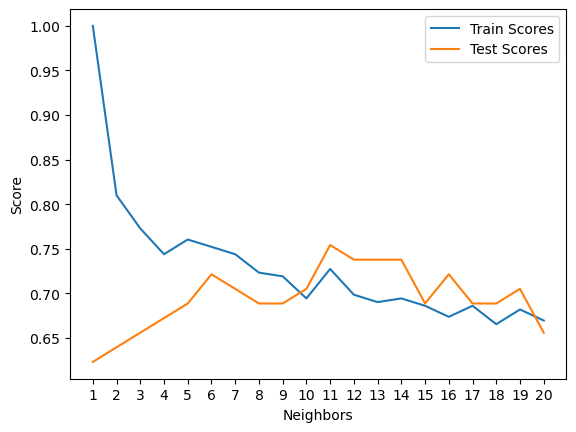

In [34]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.legend()
plt.xticks(np.arange(1, 21, 1));

print(f"The highest KNN score on the test data set is {max(test_scores) :.2f}%")

## Hyperparamenter Tuning using RandomizedSearchCV

In [35]:
#Logistic regression hyperparameter grid
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

#RFC hyperparamenter grid
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [36]:
#Logistic regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [38]:
best_model = rs_log_reg.best_estimator_
best_model.score(X_test, y_test)

0.8852459016393442

In [ ]:
#Tuning Random Forest Classifier
np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=2)

#fitting model to data
rs_rfc.fit(X_train, y_train)

best_rf = rs_rfc.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.5s
[CV] END max_de

In [ ]:
rs_rfc.best_params_

In [ ]:
#Evaluating the randomized search random forest classifier
best_rf.score(X_test, y_test)

In [ ]:
model_scores

## Hyperparameter tuning with GridSearchCV

> This will be applied to the Logistic Regression Model since it maintains the highest score

In [ ]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

#performing grid search
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)

#Fitting grid search model
gs_log_reg.fit(X_train, y_train)

best_model = gs_log_reg.best_estimator_

In [ ]:
gs_log_reg.best_params_

In [ ]:
#Evaluating grid search LogisticRegressionModel
best_model.score(X_test, y_test)

## Evaluating the tuned Machine Learning Classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [ ]:
#Making predictions with the tuned model
y_preds = best_model.predict(X_test)

In [ ]:
y_preds

In [ ]:
# from sklearn.metrics import roc_curve

# y_probs = best_model.predict_proba(X_test)

# y_probs

In [ ]:
# y_probs_positive = y_probs[:,1]

# # y_probs
# y_probs_positive[:10]

In [ ]:
# len(y_probs)

In [ ]:
# #calculating the fpr, trp and threshholds

# fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
# fpr

In [ ]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test);

In [ ]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a visual representation of the confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True labels")

plot_conf_matrix(y_test, y_preds)

## Plotting Confusion Matrix using Scikit-Learn

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X, y);

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

In [ ]:
print(classification_report(y_test, y_preds))

## Evaluation Metrics Using Cross Validation

In [ ]:
best_model.get_params()

In [ ]:
#Cross-validated accuracy

cv_accuracy = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)

print(cv_accuracy)

In [ ]:
#Cross-validated precision
cv_precision = cross_val_score(best_model, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)

print(cv_precision)

In [ ]:
#Cross-validated recall
cv_recall = cross_val_score(best_model, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)

print(cv_recall)

In [ ]:
#Cross validated f1-score
cv_f1 = cross_val_score(best_model, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)

print(cv_f1)

In [ ]:
scores = {}

def cross_validated_scoring(model, X, y,cv=5):
    """Calculates cross-validated scores for an estimator and return the mean score for the metric used
        Default values : CV=5"""
    
    # scores = {}
    
    metrics = {"Accuracy" : "accuracy",
           "Precision" : "precision",
           "Recall" : "recall",
           "F1 Score" : "f1"}
    
    for name, metric in metrics.items():
        score = cross_val_score(model, X, y, cv=5, scoring=metric)
        scores[name] = round(score.mean(), 2)

    return scores

In [ ]:
cross_validated_scoring(best_model, X=X, y=y, cv=5)

In [ ]:
scores

In [ ]:
scores_df = pd.DataFrame(scores, index=[0])
scores_df.T.plot.bar(title="Cross-validated scores", color="darkblue", legend=False);

In [ ]:
cv_metrics = pd.DataFrame({"accuracy":cv_accuracy,
                           "precision":cv_precision,
                           "recall":cv_recall,
                           "f1":cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance

In [ ]:
df.head()

In [ ]:
best_model.get_params()

In [ ]:
#Fit best model
best_model.fit(X_train, y_train)

In [117]:
best_model.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [123]:
#Matching the coefficients to the feature columns
feature_dict = dict(zip(df.columns, list(best_model.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

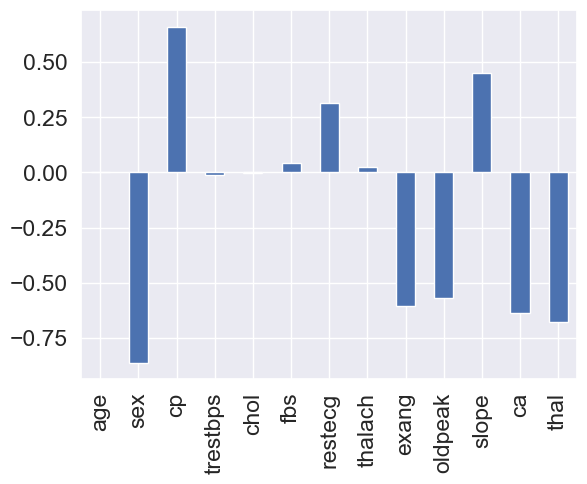

In [126]:
#Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False);

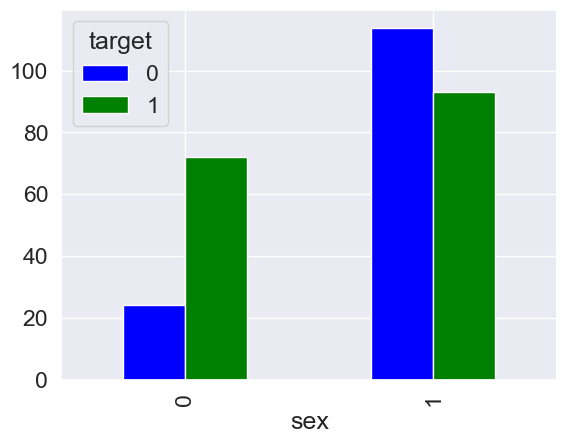

In [131]:
pd.crosstab(df.sex, df.target).plot.bar(color=["blue", "green"]);

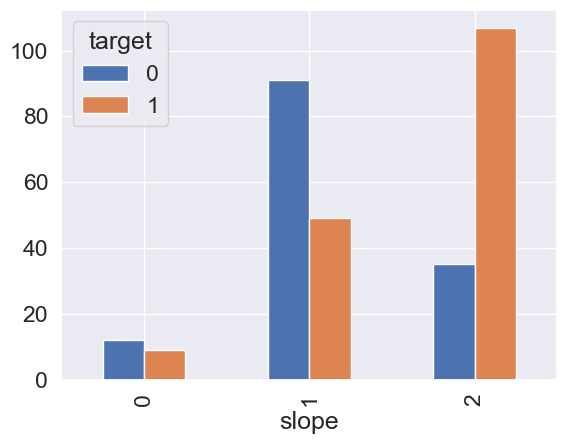

In [132]:
pd.crosstab(df.slope, df.target).plot(kind="bar");